###  Dataset contains statistics of hate crimes that happened within 10 days of 2016 US elections. In that period, nearly 900 hate incidents were reported to the Southern Poverty Law Center, averaging out to 90 per day. By comparison, about 36,000 hate crimes were reported to the FBI from 2010 through 2015 — an average of 16 per day.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the contents of the file into a DataFrame
df_hatecrime = pd.read_csv("hatecrime.csv")
df_hatecrime.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [3]:
df_hatecrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   state                                     51 non-null     object 
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                                51 non-null     float64
 8   share_non_white                           51 non-null     float64
 9   share_voters_voted_trump                  51 non-null     float64
 10  hate_crimes_per_100k_splc               

In [4]:
print(df_hatecrime)

                   state  median_household_income  share_unemployed_seasonal  \
0                Alabama                    42278                      0.060   
1                 Alaska                    67629                      0.064   
2                Arizona                    49254                      0.063   
3               Arkansas                    44922                      0.052   
4             California                    60487                      0.059   
5               Colorado                    60940                      0.040   
6            Connecticut                    70161                      0.052   
7               Delaware                    57522                      0.049   
8   District of Columbia                    68277                      0.067   
9                Florida                    46140                      0.052   
10               Georgia                    49555                      0.058   
11                Hawaii                

In [5]:
non_numeric_rowz = []

# Iterate through each row in the DataFrame
for index, row in df_hatecrime.iterrows():
    
    if not str(row['hate_crimes_per_100k_splc']).isdigit():
        # If conversion fails, append the row to the list
        non_numeric_rowz.append(row)

# Convert the list of rows to a DataFrame
non_numeric_df1 = pd.DataFrame(non_numeric_rowz)

# Print the DataFrame containing rows where conversion fails
print("Rows where 'hate' column values cannot be converted to int:")
# print(non_numeric_df1)

Rows where 'hate' column values cannot be converted to int:


In [6]:
# Calculate the mean or median of the column

median_value = df_hatecrime['hate_crimes_per_100k_splc'].median()

# Impute NaN values with the mean or median
df_hatecrime['hate_crimes_per_100k_splc'] = df_hatecrime['hate_crimes_per_100k_splc'].fillna(median_value)

# Impute missing values for 'share_non_white'
df_hatecrime['share_non_white'] = df_hatecrime['share_non_white'].fillna(df_hatecrime['share_non_white'].mean())

# Impute missing values for 'share_non_citizen'
df_hatecrime['share_non_citizen'] = df_hatecrime['share_non_citizen'].fillna(df_hatecrime['share_non_citizen'].mean())

# Impute missing values for 'share_white_poverty'
df_hatecrime['share_white_poverty'] = df_hatecrime['share_white_poverty'].fillna(df_hatecrime['share_white_poverty'].mean())

# Print the DataFrame to verify the imputation
print(df_hatecrime)

                   state  median_household_income  share_unemployed_seasonal  \
0                Alabama                    42278                      0.060   
1                 Alaska                    67629                      0.064   
2                Arizona                    49254                      0.063   
3               Arkansas                    44922                      0.052   
4             California                    60487                      0.059   
5               Colorado                    60940                      0.040   
6            Connecticut                    70161                      0.052   
7               Delaware                    57522                      0.049   
8   District of Columbia                    68277                      0.067   
9                Florida                    46140                      0.052   
10               Georgia                    49555                      0.058   
11                Hawaii                

In [ ]:
### How does income inequality relate to the number of hate crimes and hate incidents? [5 points]

In [7]:
# Calculate correlation coefficients
pearson_corr = df_hatecrime['gini_index'].corr(df_hatecrime['hate_crimes_per_100k_splc'])
spearman_corr = df_hatecrime['gini_index'].corr(df_hatecrime['hate_crimes_per_100k_splc'], method='spearman')

print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)

# Perform simple linear regression
from sklearn.linear_model import LinearRegression
X = df_hatecrime[['gini_index']]
y = df_hatecrime['hate_crimes_per_100k_splc']
model = LinearRegression()
model.fit(X, y)
print(f'Slope: {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')

Pearson Correlation: 0.3377840185516733
Spearman Correlation: -0.051992753623188406
Slope: 3.93
Intercept: -1.49


The Pearson correlation coefficient measures the linear relationship between two variables. The Pearson correlation coefficient between the Gini index (a measure of income inequality) and hate crimes per 100,000 people reported by SPLC is 0.338 which suggests a moderate positive linear relationship between income inequality and hate crimes.

The Spearman correlation coefficient measures the monotonic relationship between two variables, particularly when the relationship between variables is not linear. The Spearman correlation coefficient between the Gini index and hate crimes reported by SPLC is -0.052 which is a weak negative monotonic relationship.

Regression Analysis: The slope of the regression line represents the change in the dependent variable for a one-unit change in the independent variable. The slope is 3.93 that indicates that for every one-unit increase in the Gini index, the hate crimes per 100,000 people is expected to increase by approximately 3.93. The intercept(-1.4) represents the value of the dependent variable when the independent variable is zero.

In [ ]:
### How can we predict the number of hate crimes and hate incidents from race/nature of the population? [5 points]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_hatecrime.columns = ['state', 'median_household_income', 'share_unemployed_seasonal', 
                        'share_population_in_metro_areas', 'share_population_with_high_school_degree',
                        'share_non_citizen', 'share_white_poverty', 'gini_index', 'share_non_white',
                        'share_voters_voted_trump', 'hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']

# X contains features related to race/nature of the population
# and y contains the target variable (number of hate crimes/incidents)
X = df_hatecrime[['share_non_white', 'share_non_citizen', 'share_white_poverty']]
y = df_hatecrime['hate_crimes_per_100k_splc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Predict the number of hate crimes/incidents using the trained model
new_data = pd.DataFrame([[0.6, 0.08, 0.15]], columns=['share_non_white', 'share_non_citizen', 'share_white_poverty'])
predicted_hate_crimes = model.predict(new_data)
print("Predicted Number of Hate Crimes/Incidents:", predicted_hate_crimes)

Mean Squared Error: 0.03992014653429463
Predicted Number of Hate Crimes/Incidents: [0.13165514]


The MSE of 0.0399 indicates a reasonably good fit on the testing set. The hate crime rate difference of around 6.3 (square root of 0.0399) per 100,000 people between predicted and actual values.
The model predicts a hate crime rate of approximately 0.132 per 100,000 people for the new data point (0.6,0.8,0.015) This represents the model's estimate based on the features included

### How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it? 

Descriptive Statistics of Hate Crimes per 100,000 People:
       hate_crimes_per_100k_splc  avg_hatecrimes_per_100k_fbi
count                  51.000000                    50.000000
mean                    0.297983                     2.367613
std                     0.243311                     1.714245
min                     0.067447                     0.266941
25%                     0.147645                     1.293139
50%                     0.226197                     1.987068
75%                     0.343006                     3.184344
max                     1.522302                    10.953480


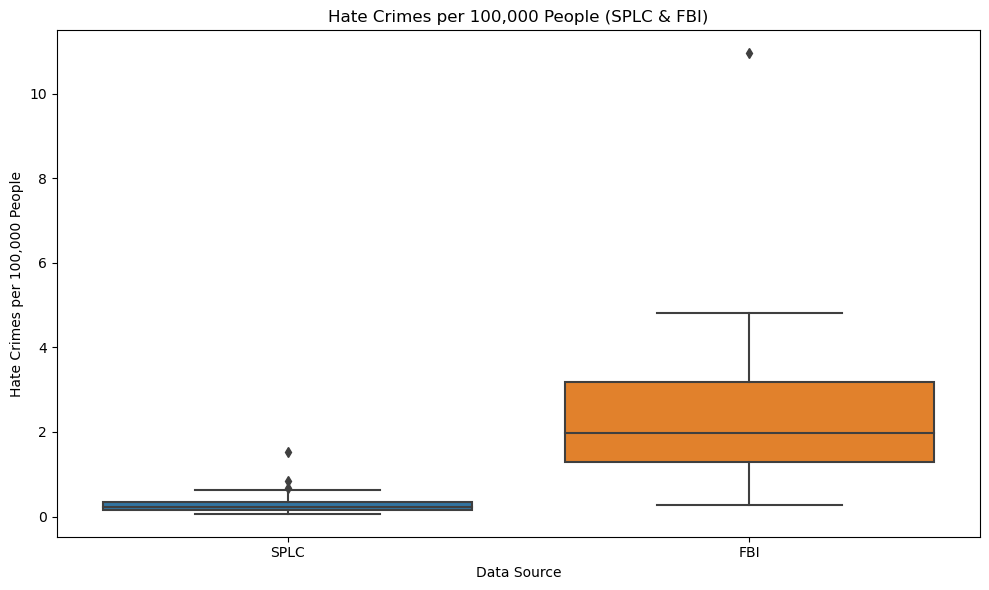


 Correlation between SPLC and FBI Hate Crime Data: 0.7226105914658595

 States with SPLC hate crimes per 100,000 people within the FBI data range:

['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Iowa', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Montana', 'New Mexico', 'New York', 'Oregon', 'Pennsylvania', 'Vermont', 'Virginia', 'Washington', 'West Virginia']


In [9]:
# Descriptive statistics for hate crimes per 100,000 people (SPLC and FBI)
print("Descriptive Statistics of Hate Crimes per 100,000 People:")
print(df_hatecrime[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']].describe())

# Visualization (boxplots) to compare distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hatecrime[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']])
plt.title("Hate Crimes per 100,000 People (SPLC & FBI)")
plt.ylabel("Hate Crimes per 100,000 People")
plt.xlabel("Data Source")
plt.xticks(ticks=[0, 1], labels=['SPLC', 'FBI'])
plt.tight_layout()
plt.show()

# Check for correlation between SPLC and FBI data
correlation = df_hatecrime['hate_crimes_per_100k_splc'].corr(df_hatecrime['avg_hatecrimes_per_100k_fbi'])
print("\n Correlation between SPLC and FBI Hate Crime Data:", correlation)

# Calculate minimum and maximum values
min_splc = df_hatecrime['hate_crimes_per_100k_splc'].min()
max_splc = df_hatecrime['hate_crimes_per_100k_splc'].max()
min_fbi = df_hatecrime['avg_hatecrimes_per_100k_fbi'].min()
max_fbi = df_hatecrime['avg_hatecrimes_per_100k_fbi'].max()

# Identify states with similar ranges
similar_range_states = df_hatecrime[(df_hatecrime['hate_crimes_per_100k_splc'] >= min_fbi) & 
                                   (df_hatecrime['hate_crimes_per_100k_splc'] <= max_fbi)]

print("\n States with SPLC hate crimes per 100,000 people within the FBI data range:\n")
print(similar_range_states['state'].tolist())

There is a strong positive correlation coefficient between SPLC and FBI hate crime data is 0.723. 
The mean hate crimes is 0.298 for SPLC data and 2.368 for FBI data. On average, the FBI reports higher hate crime rates compared to SPLC.
The standard deviation measures the dispersion of values around the mean. For SPLC data, the hate crime rates have less variability std is 0.243 compared to FBI data is 1.714, indicating that the hate crime rates vary more widely in the FBI data.
The minimum hate crime rate is lower in SPLC data min is 0.067 compared to FBI data min is 0.267. The maximum hate crime rate is higher in SPLC data max is 1.522) compared to FBI data max is 10.953).